# Get Insights From Failed Ride Orders

# Table Content
* [Business Statement](#business-statement)
* [Data Description](#data-description)
* [Task Assignment](#task-assignment)
* [Data Reading and Exploration](#data-reading-and-exploration)
* [Question 1](#question-1)
* [Question 2](#question-2)
* [Question 3](#question-3)
* [Question 4](#question-4)
* [Question 5 BONUS](#question-5-bonus)


# Business Statement

The business is involved in managing and analyzing order-related data, likely within the context of a service or delivery platform. The `data_orders` dataset captures essential information about each order, encompassing temporal, spatial, and status-related details. The key attributes include the order datetime, geographical coordinates of the order location, estimated time before order arrival, order number, order status, driver assignment status, and the time before cancellation.

The order status key, denoted by values such as `4` for client cancellations and `9` for system rejections, provides insights into the outcomes of the orders. The binary indicator `is_driver_assigned_key` informs whether a driver has been assigned to fulfill the order.

Additionally, the `cancellation_time_in_seconds` field indicates the time elapsed before cancellation, providing a metric to assess the efficiency of the service and potential areas for improvement.

The `data_offers` dataset serves as a mapping, associating order numbers with offer IDs. This mapping likely plays a role in tracking and managing offers associated with each order.

In summary, the business seems to operate in a domain where timely order fulfillment and efficient management of order-related processes are critical. Analyzing the provided datasets can offer valuable insights into customer behavior, service efficiency, and potential optimizations within the order fulfillment pipeline.
    

![Image](https://camo.githubusercontent.com/94e0e204e1b06a32f39c432b5f37d413651ecce17f7d9b2e5c688228e446cfdc/68747470733a2f2f74682e62696e672e636f6d2f74682f69642f522e62653865383431313237613032643439303066303364656330373461333765633f72696b3d6b613948582532625248385356495677267269753d68747470253361253266253266686f6d652e62742e636f6d253266696d61676573253266666f722d616e2d6164646974696f6e616c2d3230702d676574742d63616e2d6e6f772d6d616b652d796f75722d726964652d636172626f6e2d6e65757472616c2d3133363432393530353835303030323630312d3138303931333030313033372e6a70672665686b3d413251324d59746139434c636c3446346476674f754d75515a45253262736b386a4f346f424f70466839446249253364267269736c3d267069643d496d6752617726723d30)



# Data Description

We have two datasets stored in CSV format: `data_orders` and `data_offers`.

**`data_orders` Dataset:**
- `order_datetime`: Time of the order.
- `origin_longitude` and `origin_latitude`: Longitude and latitude of the order.
- `m_order_eta`: Time before order arrival.
- `order_gk`: Order number.
- `order_status_key`: Status enumeration, where `4` corresponds to cancellation by the client, and `9` indicates cancellation by the system (reject).
- `is_driver_assigned_key`: Indicates whether a driver has been assigned.
- `cancellation_time_in_seconds`: Time in seconds before cancellation.

**`data_offers` Dataset:**
- `order_gk`: Order number, associated with the corresponding column in `data_orders`.
- `offer_id`: ID of an offer.

These datasets provide comprehensive information about orders, including temporal details, geographical coordinates, order status, driver assignment, and cancellation times. The `data_offers` dataset serves as a mapping between order numbers and offer IDs.


# Task Assignment

Kindly fulfill the designated tasks outlined below:

1. **Analysis of Order Failures:**
   - Organize orders based on reasons for failure, distinguishing between cancellations before and after driver assignment, as well as reasons for order rejection.
   - Generate a comprehensive plot to visually represent the distribution. Identify the category with the highest volume of orders.

2. **Hourly Distribution of Failed Orders:**
   - Plot the distribution of failed orders across different hours.
   - Examine if certain hours exhibit an unusually high proportion of specific failure categories. Identify peak failure hours and offer explanations for such patterns.

3. **Average Cancellation Time Analysis:**
   - Plot the average time to cancellation with and without driver involvement, segmented by the hour.
   - Consider removing outliers from the dataset and draw conclusions based on the resulting plot.

4. **Average ETA Distribution by Hours:**
   - Visualize the distribution of average Estimated Time of Arrival (ETA) across various hours.
   - Provide explanations for the observed patterns in the plot.

5. **BONUS: Hexagon Visualization:**
   - Utilize the h3 and folium packages to calculate the number of size 8 hexagons required to encompass 80% of all orders from the original datasets.
   - Create a visual representation of these hexagons on a map, color-coded based on the number of order failures.



# Data Reading and Exploration

We will employ the Pandas library to import the CSV files, transforming them into a DataFrame for further exploration.


In [10]:
import pandas as pd

# Read data from a CSV file into a Pandas DataFrame
custom_orders_data_frame = pd.read_csv(filepath_or_buffer="./datasets/data_orders.csv")
custom_orders_data_frame.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [9]:
# Read data from a CSV file into a Pandas DataFrame
custom_offers_data_frame = pd.read_csv(filepath_or_buffer="./datasets/data_offers.csv")
custom_offers_data_frame.head()


,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


**Merging DataFrames for Streamlined Manipulation:**

To facilitate seamless manipulation, we aim to combine the two DataFrames into a single entity. Pandas provides the `merge()` method, akin to joining tables in SQL, for this purpose. We define the merging strategy (using "inner") and specify the column for the merge operation (order_gk). Subsequently, we display a sample of the resulting merged DataFrame.


In [11]:
# Merge two DataFrames (orders and offers) based on a common column "order_gk"
merged_data_frame = custom_orders_data_frame.merge(right=custom_offers_data_frame, how="inner", on="order_gk")
merged_data_frame

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,300051590196
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,300051590176
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,300051648809
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,300051648910


**Enhancing Data Quality:**

To improve the overall data quality, we can undertake certain modifications. Specifically, for columns such as `order_status_key` and `is_driver_assigned_key`, the existing values serve as internal keys rather than informative descriptors. To enhance interpretability, we propose replacing 1s with "Yes" and 0s with "No" in the `is_driver_assigned_key` column, and a similar transformation for the `order_status_key` column.

Additionally, for enhanced clarity, we can refine the column names, as they currently sound somewhat technical.


In [12]:
import numpy as np

# Create a new column "is_driver_assigned" based on the values of "is_driver_assigned_key"
merged_data_frame["is_driver_assigned_flag"] = np.where(merged_data_frame["is_driver_assigned_key"] == 1, "Yes", "No")

# Create a new column "order_status" based on the values of "order_status_key"
merged_data_frame["custom_order_status"] = np.where(merged_data_frame["order_status_key"] == 4, "Client Cancelled", "System Reject")

# Drop the original columns used for creating new columns
merged_data_frame.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)



In [13]:
# Rename the "order_datetime" column to "order_time"
merged_data_frame = merged_data_frame.rename(columns={"order_datetime": "order_time"})

merged_data_frame

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned_flag,custom_order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,No,Client Cancelled
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,No,Client Cancelled
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,No,Client Cancelled
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,Yes,Client Cancelled



# Question 1
### Analyzing Distribution of Order Failures

To construct a distribution of orders based on reasons for failure, including cancellations before and after driver assignment, and reasons for order rejection, an effective approach is to utilize the `groupby` method. This method allows us to group the DataFrame by the `is_driver_assigned` and `order_status` columns, subsequently counting the rows in each group—essentially creating a breakdown for each combination of values in the grouping columns.

Given that both `is_driver_assigned` and `order_status` are binary variables with only two possible values, we encounter four possible combinations. The code snippet below showcases the output of this proposed approach.


In [14]:
# Group the DataFrame by "is_driver_assigned" and "order_status", then count the occurrences of "order_gk" for each group
grouped_counts = merged_data_frame.groupby(by=["is_driver_assigned_flag", "custom_order_status"])["order_gk"].count()

grouped_counts

is_driver_assigned_flag  custom_order_status
No                       Client Cancelled       13435
                         System Reject           9469
Yes                      Client Cancelled        8360
                         System Reject              4
Name: order_gk, dtype: int64

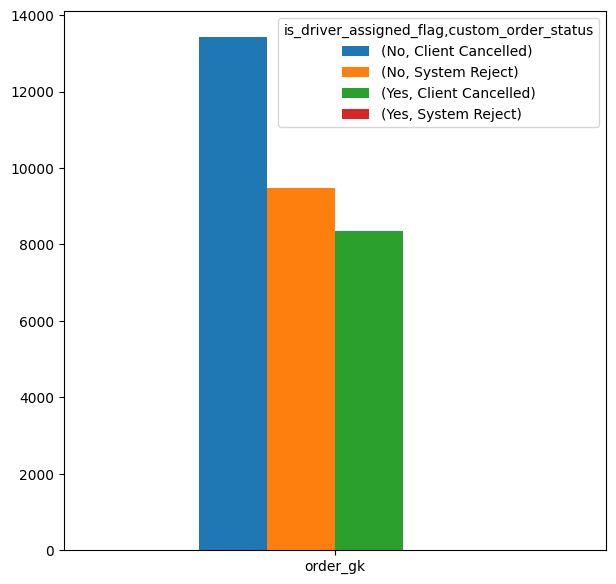

In [15]:
# Create a pivot table using "is_driver_assigned" and "order_status" as columns, "order_gk" as values, and count as the aggregation function
df_q1 = merged_data_frame.pivot_table(columns=["is_driver_assigned_flag", "custom_order_status"], values="order_gk", aggfunc='count')

# Plot the pivot table as a bar chart
ax = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)


In [16]:
df_q1

is_driver_assigned_flag               No                            Yes  \
custom_order_status     Client Cancelled System Reject Client Cancelled   
order_gk                           13435          9469             8360   

is_driver_assigned_flag                
custom_order_status     System Reject  
order_gk                            4

# Question 2
### Hourly Distribution of Failed Orders
   - Plot the distribution of failed orders across different hours.
   - Examine if certain hours exhibit an unusually high proportion of specific failure categories. Identify peak failure hours and offer explanations for such patterns.

In [18]:
# Extract hour from the "order_time" column and create a new column "order_hour"
merged_data_frame["order_hour"] = merged_data_frame["order_time"].str.split(":").apply(lambda split: split[0])

# Print a small sample to verify the transformation
(merged_data_frame.sample(n=5, random_state=42))

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned_flag,custom_order_status,order_hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21


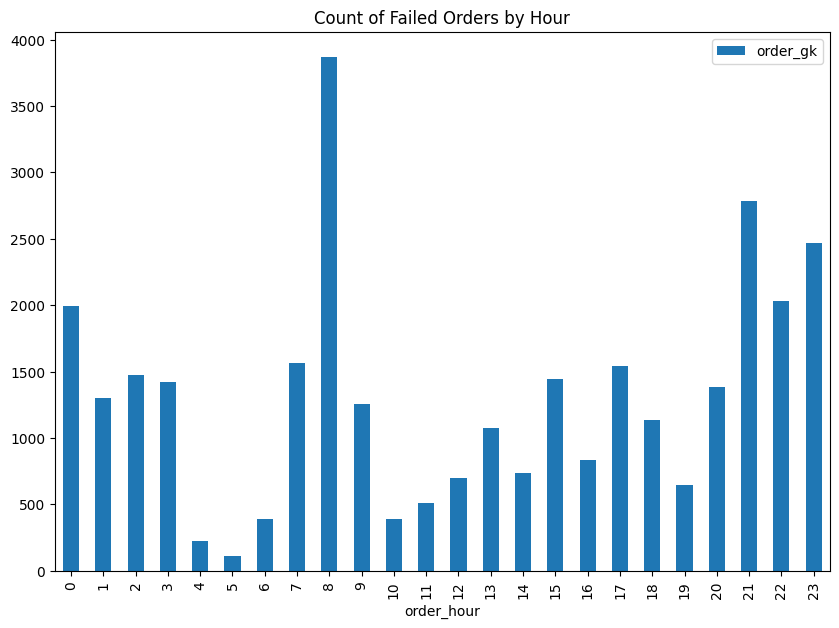

In [19]:
# Group the DataFrame by "order_hour" and count the occurrences of "order_gk" for each hour
hourly_order_counts = merged_data_frame.groupby(by="order_hour")["order_gk"].count()

# Plot the count of failed orders by hour
ax = hourly_order_counts.plot(kind="bar", figsize=(10, 7), legend=True, xticks=range(0, 24), title="Count of Failed Orders by Hour")




**Aggregating Information with GroupBy:**

As an initial step towards creating a DataFrame containing aggregated information, we employ the `groupby` operation on the columns representing order hour, the driver-assigned flag, and order status. The subsequent step involves counting the number of occurrences of `order_gk` within each group.



In [20]:
# Group the DataFrame by "order_hour", "is_driver_assigned", and "order_status"
# Then, count the occurrences of "order_gk" for each group
grouped_q2 = merged_data_frame.groupby(by=["order_hour", "is_driver_assigned_flag", "custom_order_status"])["order_gk"].count()
grouped_q2


order_hour  is_driver_assigned_flag  custom_order_status
00          No                       Client Cancelled        957
                                     System Reject           706
            Yes                      Client Cancelled        326
                                     System Reject             4
01          No                       Client Cancelled        633
                                                            ... 
22          No                       System Reject           660
            Yes                      Client Cancelled        415
23          No                       Client Cancelled       1144
                                     System Reject           883
            Yes                      Client Cancelled        444
Name: order_gk, Length: 73, dtype: int64

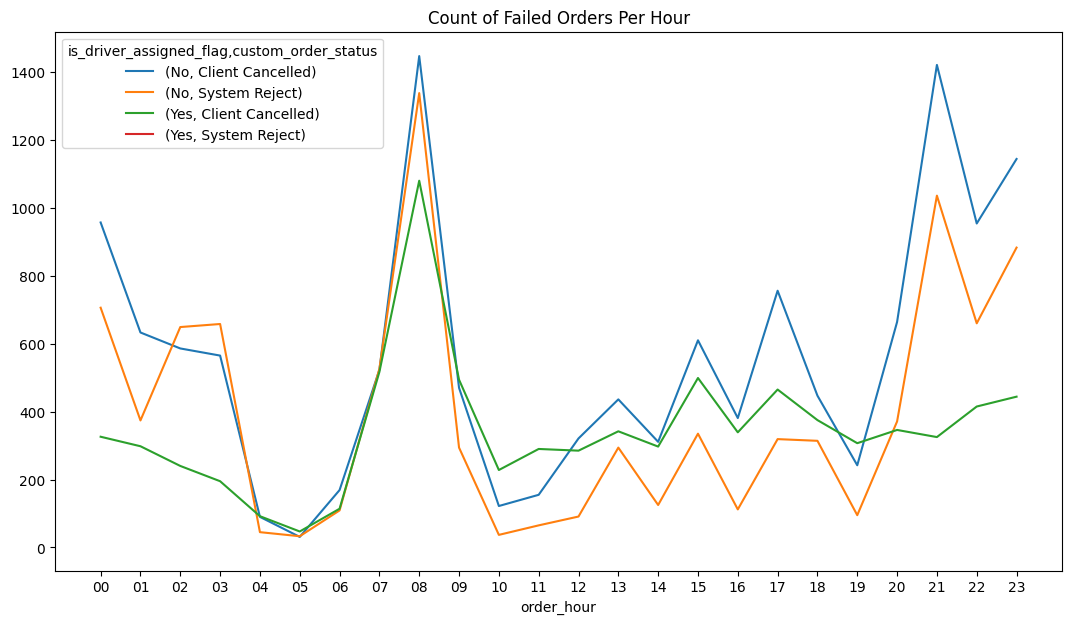

In [21]:
# Reset the index of the grouped DataFrame and create a pivot table for plotting
pivot_table_q2 = grouped_q2.reset_index().pivot(
    index="order_hour",
    columns=["is_driver_assigned_flag", "custom_order_status"],
    values="order_gk"
)

# Plot the count of failed orders per hour based on the pivot table
ax = pivot_table_q2.plot(
    xticks=range(0, 24),
    figsize=(13, 7),
    title="Count of Failed Orders Per Hour"
)

**Analysis of Grouped Data Output:**

Upon inspecting the output of the grouped DataFrame, a notable observation emerges. Specifically, the four instances of system rejects with an assigned driver occurred predominantly around midnight.

The distribution of the remaining categories exhibits a similar pattern, with client cancellations accompanied by an assigned driver displaying a significantly lower count during the night hours.

This insight provides a preliminary understanding of temporal trends within the different failure categories, setting the stage for a more in-depth exploration of temporal dynamics in subsequent analyses.


# Question 3
### Average Cancellation Time Analysis
   - Plot the average time to cancellation with and without driver involvement, segmented by the hour.
   - Consider removing outliers from the dataset and draw conclusions based on the resulting plot.

To address this question, we will employ a similar approach as in the previous analysis. Initially, we will aggregate the DataFrame by considering the order hour and the driver-assignment flag. Subsequently, we will aggregate the `cancellations_time_in_seconds` column using the mean function. This method will provide us with the necessary aggregated information concerning cancellation times.



In [24]:
# Group the DataFrame by "order_hour" and "is_driver_assigned"
# Then, count the occurrences of "cancellations_time_in_seconds" for each group
grouped_q3 = merged_data_frame.groupby(by=["order_hour", "is_driver_assigned_flag"])["cancellations_time_in_seconds"].count()

grouped_q3

order_hour  is_driver_assigned_flag
00          No                          957
            Yes                         326
01          No                          633
            Yes                         298
02          No                          586
            Yes                         240
03          No                          565
            Yes                         195
04          No                           90
            Yes                          92
05          No                           31
            Yes                          47
06          No                          169
            Yes                         114
07          No                          523
            Yes                         517
08          No                         1447
            Yes                        1080
09          No                          470
            Yes                         494
10          No                          122
            Yes                         

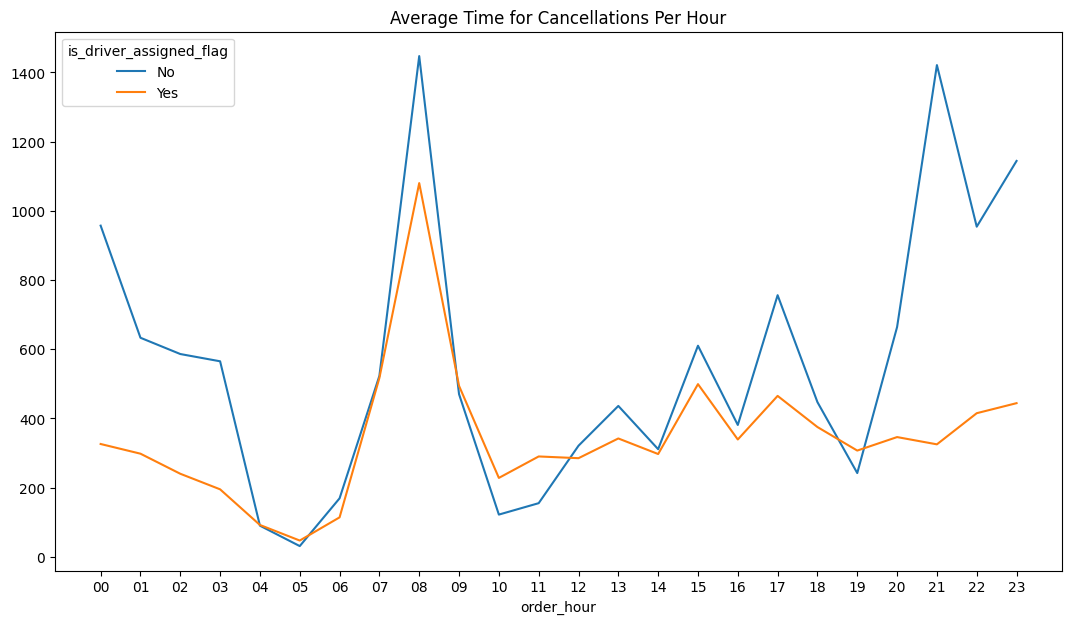

In [25]:
# Reset the index of the grouped DataFrame and create a pivot table for plotting
pivot_table_q3 = grouped_q3.reset_index().pivot(
    index="order_hour",
    columns="is_driver_assigned_flag",
    values="cancellations_time_in_seconds"
)

# Plot the average time for each hour based on the pivot table
ax = pivot_table_q3.plot(
    xticks=range(0, 24),
    figsize=(13, 7),
    title="Average Time for Cancellations Per Hour"
)



Notably, the peak in average cancellation time occurs at 3 A.M. During this timeframe, a substantial number of client cancellations is observed. A logical explanation for this pattern could be that clients may have experienced prolonged wait times for the assigned driver, leading to a higher likelihood of cancellations during this specific hour.

This insight underscores the importance of considering temporal dynamics when evaluating cancellation times, providing valuable context for optimizing service efficiency.

# Question 4
### Average ETA Distribution by Hours 
   - Visualize the distribution of average Estimated Time of Arrival (ETA) across various hours.
   - Provide explanations for the observed patterns in the plot.


**Solution to Question 4: Analyzing Average ETA by Hours**

The solution to this question involves a straightforward approach. We utilize the `groupby` operation on the DataFrame, focusing on the order hour. Subsequently, we aggregate the `m_order_eta` column using the mean function. The resulting DataFrame is then visualized through a plotted line graph.


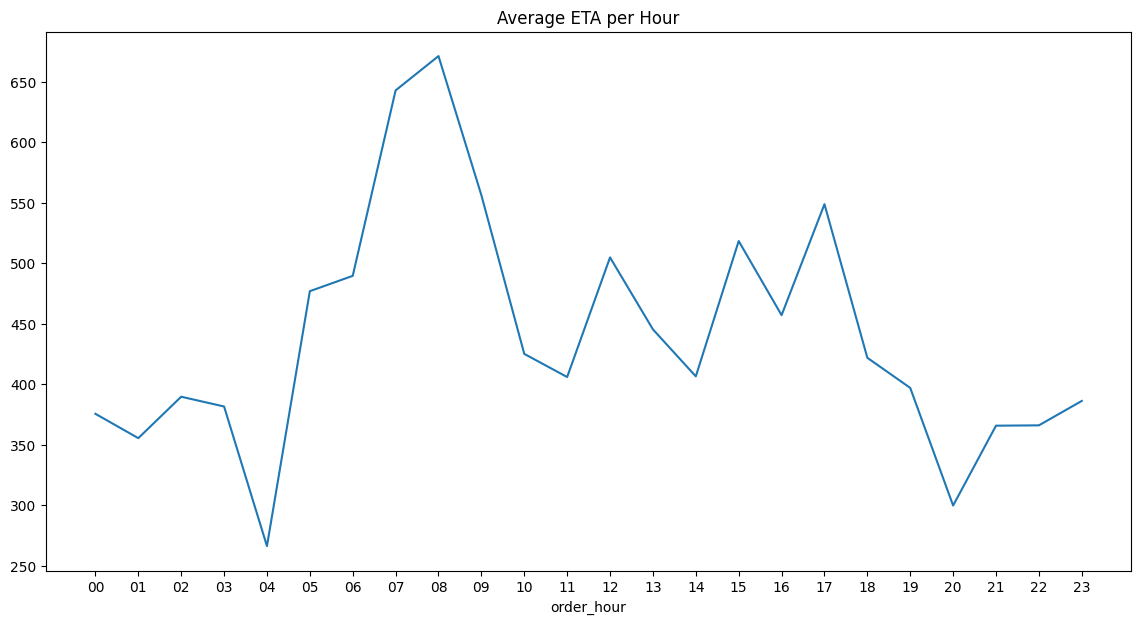

In [26]:
# Group the DataFrame by "order_hour" and calculate the mean of "m_order_eta" for each hour
average_eta_per_hour = merged_data_frame.groupby(by="order_hour")["m_order_eta"].mean()

# Plot the average ETA per hour
ax = average_eta_per_hour.plot(figsize=(14, 7), xticks=range(0, 24), title="Average ETA per Hour")



Using the h3 and folium packages, calculate how many size 8 hexes contain 80% of all orders from the
original data sets and visualise the hexes, colouring them by the number of fails on the map

# Question 5 BONUS
### Hexagon Visualization
   - Utilize the h3 and folium packages to calculate the number of size 8 hexagons required to encompass 80% of all orders from the original datasets.
   - Create a visual representation of these hexagons on a map, color-coded based on the number of order failures.

In [30]:
import h3
import folium

The provided Python code adds a new column "hex_id" to the merged DataFrame using the H3 library. It applies the H3 geo-to-hexagon function to calculate hexagon IDs based on latitude and longitude values. The DataFrame is then grouped by "hex_id," and the occurrences of "order_gk" are counted for each hexagon. The resulting DataFrame, containing "hex_id" and corresponding counts, is displayed with a small sample.


In [34]:
# Add a new column "hex_id" to the merged DataFrame using H3 library
merged_data_frame["hex_id"] = merged_data_frame.apply(
    lambda row: h3.geo_to_h3(lat=row["origin_latitude"], lng=row["origin_longitude"], resolution=8),
    axis=1
)

# Group the merged DataFrame by "hex_id" and count the occurrences of "order_gk" for each hexagon
grouped_q5 = merged_data_frame.groupby(by="hex_id")["order_gk"].count()

# Reset the index to have a DataFrame with "hex_id" and corresponding counts
grouped_q5 = grouped_q5.reset_index()

# Print a small sample of the grouped DataFrame
(grouped_q5.sample(n=5, random_state=42))


,hex_id,order_gk
135,88195d74d1fffff,1
66,88195d2a33fffff,12
31,88195d2941fffff,52
118,88195d2b5dfffff,31
42,88195d2961fffff,5


The provided Python code manipulates the grouped DataFrame by sorting it based on the "order_gk" column in ascending order. It then calculates the total number of orders, the cumulative sum of orders, and the cumulative percentage. Rows are selected where the cumulative percentage is less than or equal to 80%. The resulting DataFrame is displayed or can be used as needed.


In [33]:
# Sort the grouped DataFrame by "order_gk" column in ascending order
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1

# Calculate the total number of orders
total_orders = grouped_q5["order_gk"].sum()  # 2

# Calculate the cumulative sum of orders and the cumulative percentage
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4

# Select rows where the cumulative percentage is less than or equal to 80%
selected_rows = grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

# Print or use the selected rows as needed
(selected_rows)


,hex_id,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
61,88195d2a27fffff,1295,15628,49.980811
20,88195d284dfffff,1937,17565,56.175643
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196
